### Dimensionality reductio techniques:

##### 1. Principal Component Anlaysis (PCA):

##### - Import libraries

In [1]:
# !pip install plotly

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.datasets import load_breast_cancer, load_iris, make_moons, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA
from sklearn.manifold import TSNE, MDS, Isomap

import warnings
warnings.filterwarnings("ignore")

##### - Get and prepare data

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [4]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


##### - Obtain the feature matrix

In [5]:
X = df.values
X.shape

(569, 30)

##### Standardize the features

In [6]:
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

##### - Compute the covariance matrix

In [7]:
'''
we take the transpose of x becuse the covariance matrix is based on 
the nubmer of features not observations.
'''
cov_m = np.cov(X_scaled.T)
cov_m.shape

(30, 30)

##### - Compute the eigenvalues and eigenvectors of the covariance matrix.

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(cov_m)

In [9]:
eigenvalues

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [10]:
eigenvalues.shape

(30,)

In [11]:
# The variable eigenvectors returns all the eigenvectors in the form of 30x30 2d numpy array.

eigenvectors.shape

(30, 30)

In [12]:
# transpose of eigenvectors.
eigenvectors = eigenvectors.T

##### - Compute the eigenvalues as a percentage of the variance within the dataset

In [13]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99453783,
       0.99456279, 0.99461577, 0.99484578, 0.99511837, 0.99563442,
       0.99623625, 0.99704761, 0.99796226, 0.9990009 , 1.        ])

In [14]:
''' 
From the above eigenvalues, we need only the first 10 eigenvalues to 
preserve 95.15% of the variability in the data. 

'''

p = eigenvectors[0:10, :]
p.shape

(10, 30)

### - Multiply the scaled dataset by the selected eigenvectors
###### The dimensionality reduction process is a matrix multiplication of the selected eigenvectors and the (scaled) data to be transformed. Note that the transpose of the X_scaled is required to match the dimension when executing the matrix multiplication.

In [15]:
new_data = np.dot(p, X_scaled.T)
new_data.shape

(10, 569)

In [16]:
# get the transpose of new_data matrix
new_data = new_data.T
new_data.shape

(569, 10)

#### - Convert transformed data into a pandas DataFrame

In [17]:
new_df = pd.DataFrame(new_data, columns=['PC1','PC2','PC3',
                                         'PC4','PC5','PC6','PC7','PC8','PC8','PC10'])
new_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC8,PC10
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424,-2.159370,0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656,-0.013358,-0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452,0.668166,-0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422,-1.429911,-1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495,0.936213,-0.636376,-0.263805,0.377704


In [18]:
print(f'Orginal data: {df.shape}')
print(f'Transformed data: {new_df.shape}')

Orginal data: (569, 30)
Transformed data: (569, 10)


#### - Using Scikit-learn

###### * apply PCA for our dataset. Before that, we need to choose the right number of dimensions.

###### * n_components:
###### None: This is the default value. If we do not specify the value, all components are kept. In our example, this exactly the same as n_components=30.

###### int: If this is a positive integer like 1, 2, 30, 100, etc, the algorithm will return that number of principal components.

###### float: If 0 < n_components < 1, PCA will select the number of components such that the amount of variance that needs to be explained. For example, if n_components=0.95, the algorithm will select the number of components while preserving 95% of the variability in the data.


In [19]:
pca_30 = PCA(n_components=30, random_state=0)
X_pca_30 = pca_30.fit_transform(X_scaled)

In [20]:
''' 
The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array which 
contains the values of the percentage of variance explained by each of the selected components.
'''

print("Variance explained by all 30 components =", sum(pca_30.explained_variance_ratio_ * 100))

Variance explained by all 30 components = 100.0


In [21]:
# to get cumulative sum of the array
np.cumsum(pca_30.explained_variance_ratio_ * 100)

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

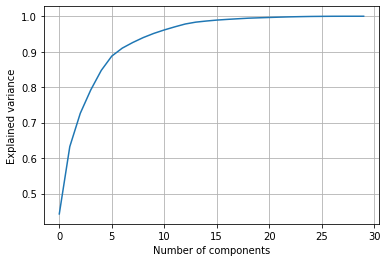

In [22]:
# create plot
plt.plot(np.cumsum(pca_30.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.grid()

In [23]:
print("Variance explained by 0 components =", np.cumsum(pca_30.explained_variance_ratio_ * 100)[0])
print("Variance explained by 4 components =", np.cumsum(pca_30.explained_variance_ratio_ * 100)[3])
print("Variance explained by 10 components =", np.cumsum(pca_30.explained_variance_ratio_ * 100)[9])

Variance explained by 0 components = 44.27202560752635
Variance explained by 4 components = 79.23850582446096
Variance explained by 10 components = 95.15688143366667


##### we can see that the first 10 principal components keep about 95.1% of the variability in the dataset while reducing 20 (30–10) features in the dataset. The remaining 20 features only contain less than 5% of the variability in data.

##### create a 3d scatterplot of the data

In [24]:
pca_4 = PCA(n_components=4, random_state=0)
pca_4_X = pca_4.fit_transform(X_scaled)

Text(0.5, 0, 'PCA3')

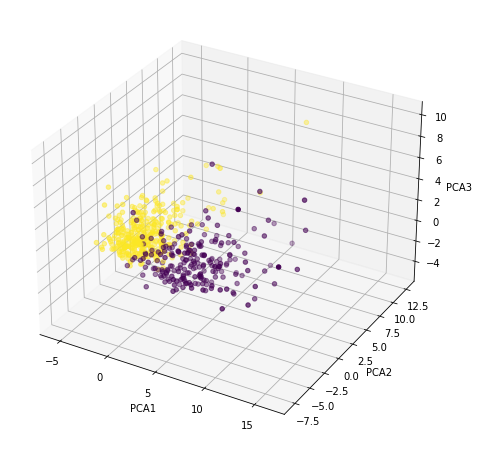

In [25]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(pca_4_X[:,0],pca_4_X[:,1],pca_4_X[:,2], c=cancer.target)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

###### Apply PCA by setting n_components=0.95

In [26]:
pca_95 = PCA(n_components=0.95, random_state=0)
X_pca_95 = pca_95.fit_transform(X_scaled)

In [27]:
X_pca_95.shape

(569, 10)

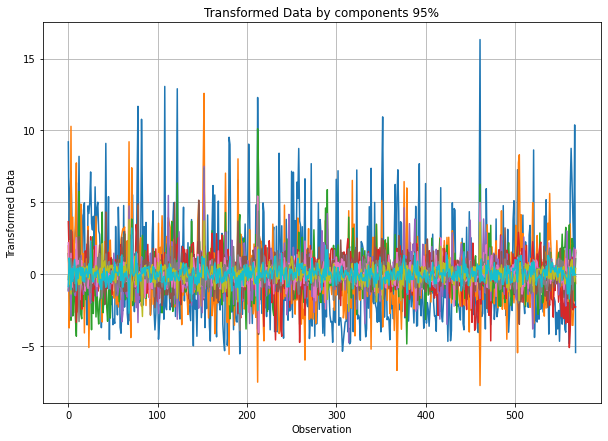

In [28]:
plt.figure(figsize=(10,7))
plt.plot(X_pca_95)
plt.xlabel('Observation')
plt.ylabel('Transformed Data')
plt.title('Transformed Data by components 95%')
plt.grid()

* ### Linear Discriminant Analysis (LDA)

In [29]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)

In [31]:
# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [32]:
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### befor applying Linear Discriminant Analysis

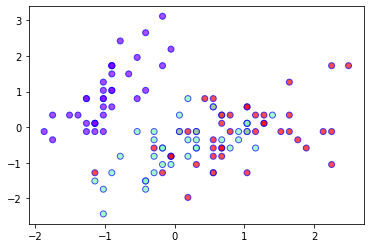

In [33]:
# plot the scatterplot b
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

In [34]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [35]:
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.9666666666666667
[[14  0  0]
 [ 0 10  1]
 [ 0  0  5]]


##### after applying Linear Discriminant Analysis

In [36]:
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

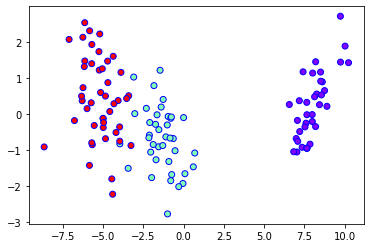

In [37]:
# plot the scatterplot
plt.scatter(
    X_train_lda[:,0],X_train_lda[:,1],c=y_train,cmap='rainbow',edgecolors='b'
)

In [38]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_lda, y_train)
y_pred_lda = classifier.predict(X_test_lda)
  
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred_lda)))
conf_m = confusion_matrix(y_test, y_pred_lda)
print(conf_m)

Accuracy : 1.0
[[14  0  0]
 [ 0 11  0]
 [ 0  0  5]]


#### - Singular Value Decomposition (SVD)

In [39]:
# Load the iris dataset
data = load_iris()
X = data['data']
y = data['target']

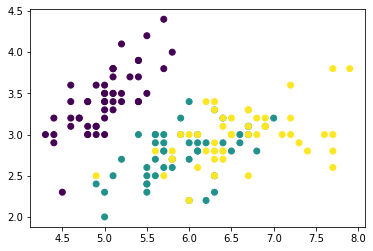

In [40]:
# Plot the orginal data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [41]:
# Perform SVD with 2 components
svd = TruncatedSVD(n_components=2)
X_transformed = svd.fit_transform(X)

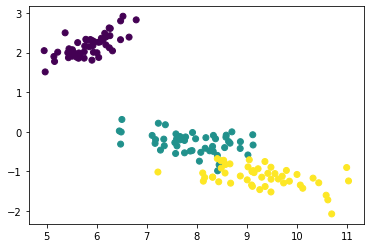

In [42]:
# Plot the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.show()

* ##### Kernel PCA

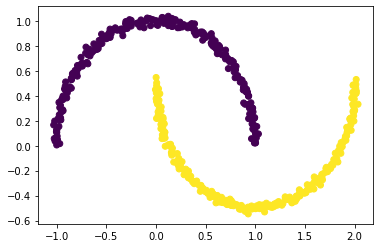

In [43]:
# Create a dataset which is nonlinear

X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417)
  
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

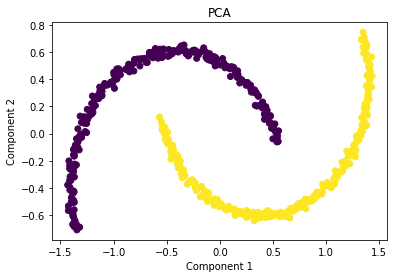

In [44]:
# apply PCA on this dataset

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
   
plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

* PCA failed to distinguish the two classes.

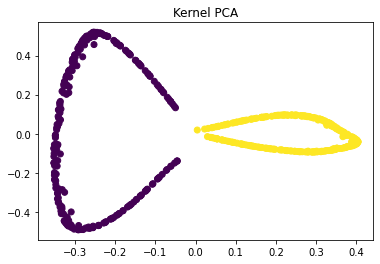

In [45]:
#  Applying kernel PCA on this dataset with RBF kernel

kpca = KernelPCA(kernel ='rbf', gamma = 15) # gamma: controls thw width of kernels
X_kpca = kpca.fit_transform(X)
  
plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y)
plt.show()

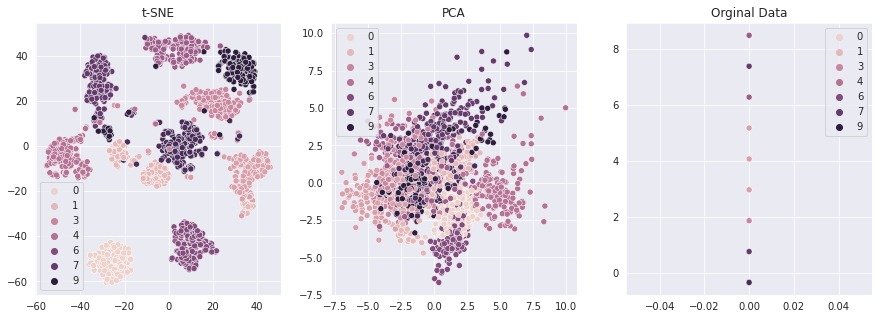

In [46]:
'''
* NOTES: 

1- The Scikit-learn documentation recommends you to use PCA or Truncated SVD before t-SNE 
if the number of features in the dataset is more than 50.

2- that feature scaling is required before PCA.
'''

sns.set_style('darkgrid')

# Load the digits dataset
X, y = load_digits(return_X_y=True)


# Scale the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


# Apply t-SNE to the data
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Apply PCA to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y,ax=ax[0])
ax[0].set_title('t-SNE')
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y,ax=ax[1])
ax[1].set_title('PCA')
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=y,ax=ax[2])
ax[2].set_title('Orginal Data')
plt.show()


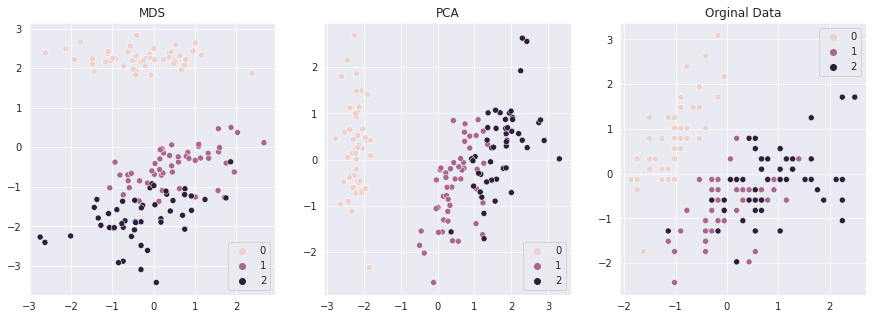

In [47]:

sns.set_style('darkgrid')

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target


# Scale the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


# Apply mds to the data
mds = MDS(n_components=2, metric=True, random_state=2)
X_mds = mds.fit_transform(X_scaled)


# Apply PCA to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(X_mds[:,0], X_mds[:,1], hue=y,ax=ax[0])
ax[0].set_title('MDS')
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y,ax=ax[1])
ax[1].set_title('PCA')
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=y,ax=ax[2])
ax[2].set_title('Orginal Data')
plt.show()


####  Isometric Mapping (Isomap)

In [48]:
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (training data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

Shape of digit images:  (1797, 8, 8)
Shape of X (training data):  (1797, 64)
Shape of y (true labels):  (1797,)


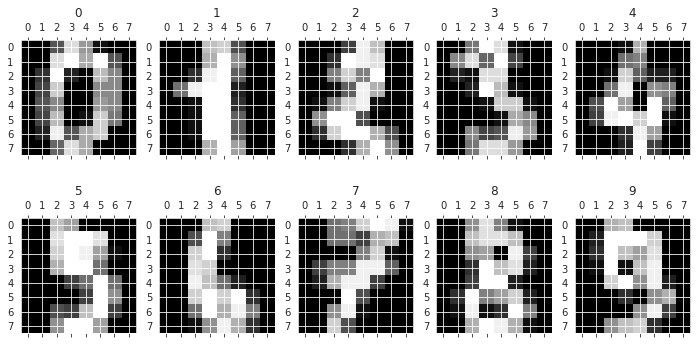

In [49]:

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, figsize=(12,6))
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n]) #  matshow: Display an array as a matrix in a new figure window.
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

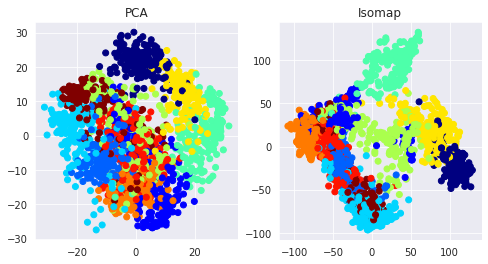

In [59]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply PCA to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply Isomap to the data
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y,cmap='jet')
ax1.set_title("PCA")
ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y,cmap='jet')
ax2.set_title("Isomap")
plt.show()

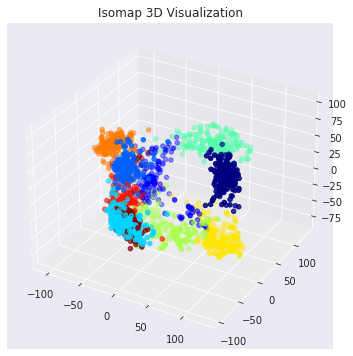

In [65]:
# Apply Isomap to the data with 3 components(dims)
isomap = Isomap(n_components=3, n_neighbors=10)
X_isomap = isomap.fit_transform(X)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_isomap[:, 0], X_isomap[:, 1], X_isomap[:, 2], c=y, cmap='jet')
ax.set_title("Isomap 3D Visualization")
plt.show()